In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from math import log10

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=7)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
plt.rcParams['axes.linewidth'] = 0.5

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes
0,m5.go.v2022.1.Mm.symbols.level3to5.gmt,GOMF_CYTOSKELETAL_PROTEIN_BINDING,41/286,5.340389e-13,1.061135e-09,4.124090,116.539793,Tpm3-rs7;Epb41l3;Pacsin2;Calm1;Tpm2;Arpc4;Calm...
1,m5.go.v2022.1.Mm.symbols.level3to5.gmt,GOMF_ACTIN_BINDING,24/117,2.996328e-11,2.976852e-08,5.574644,135.079467,Tpm3-rs7;Epb41l3;Tpm2;Arpc4;Bloc1s6;Tpm3;P4hb;...
2,m5.go.v2022.1.Mm.symbols.level3to5.gmt,GOBP_CYTOSKELETON_ORGANIZATION,42/394,4.554994e-09,3.016924e-06,3.014829,57.905952,Tpm3-rs7;Epb41l3;Pacsin2;Tpm2;Arpc4;Vim;Ehbp1l...
3,m5.go.v2022.1.Mm.symbols.level3to5.gmt,GOBP_SUPRAMOLECULAR_FIBER_ORGANIZATION,29/256,4.402304e-07,2.186844e-04,3.071379,44.952608,Tpm3-rs7;Tpm2;Arpc4;Vim;Tpm3;Myh9;Rdx;Cald1;Tm...
4,m5.go.v2022.1.Mm.symbols.level3to5.gmt,GOMF_UNFOLDED_PROTEIN_BINDING,13/63,1.159159e-06,3.899482e-04,5.418775,74.062816,Hsp90b1;Hsp90ab1;Npm1;Pet100;Pfdn6;Naca;Cdc37;...
5,m5.go.v2022.1.Mm.symbols.level3to5.gmt,GOBP_CELL_MORPHOGENESIS,32/314,1.177498e-06,3.899482e-04,2.772870,37.855554,Cfdp1;Pacsin2;Vim;P4hb;Aplp2;Myh9;Snx1;Rdx;Arh...
6,m5.go.v2022.1.Mm.symbols.level3to5.gmt,GOMF_CALCIUM_ION_BINDING,20/147,1.866959e-06,5.299496e-04,3.613185,47.662241,Nucb1;Calm1;Myl6;Calm3;S100a4;Ncl;Sparc;Sdf4;T...
7,m5.go.v2022.1.Mm.symbols.level3to5.gmt,GOMF_ACTIN_FILAMENT_BINDING,12/61,5.155764e-06,1.280563e-03,5.155879,62.774866,Tpm3-rs7;Marcks;Tpm2;Arpc4;Sptbn1;Bloc1s6;Tpm3...
8,m5.go.v2022.1.Mm.symbols.level3to5.gmt,GOCC_CELL_CORTEX,16/109,7.814581e-06,1.725286e-03,3.864929,45.449711,Marcks;Epb41l2;Sptbn1;Tpm3;Septin11;Myh9;Rdx;F...
9,m5.go.v2022.1.Mm.symbols.level3to5.gmt,GOCC_POLYMERIC_CYTOSKELETAL_FIBER,23/209,1.244352e-05,2.247752e-03,2.925995,33.047093,Tpm3-rs7;Calm1;Tpm2;Vim;Ehbp1l1;Tpm3;Calm3;Chm...


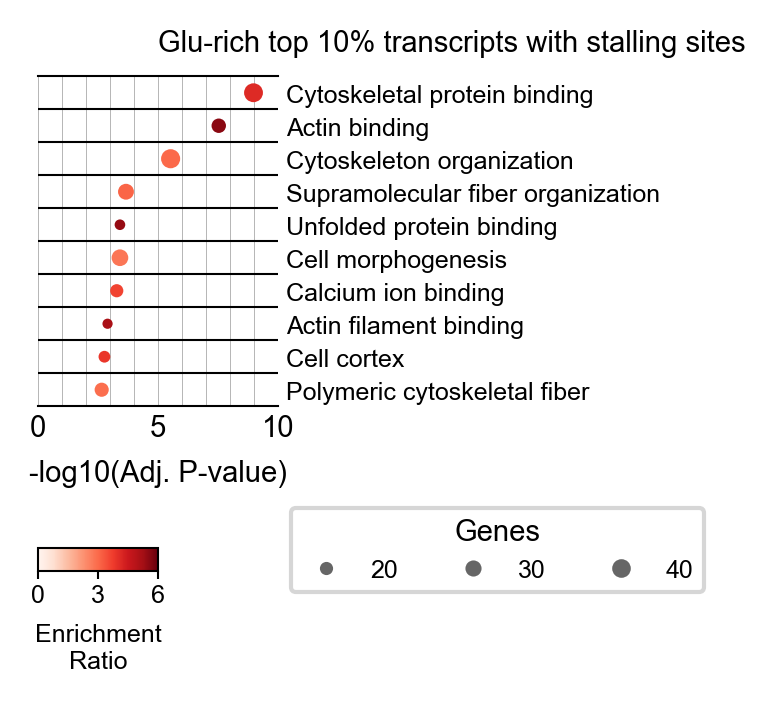

In [14]:
#options
PWnumber = 10 # pathway number; using row number
dot_size_factor = 0.5
xlims = {'Glu-rich-stalled' : (0, 10)}
xticks= {'Glu-rich-stalled' : [0,5,10]}

cutoff_std = 'Adjusted P-value'
cutoff_std_label = 'Adj. P-value'

GSs = ['Glu-rich-stalled']
input_folder = f'{Project}/Results/Tables/EnrichR/v20230918'


for GS in GSs:     
    #load data
    data = pd.read_csv(f'{input_folder}/{GS}_Enrich.tsv', sep = '\t', header=0)
    # data = data[ ~data['Term'].str.startswith('GOMF') ]
    data = data.sort_values(by=[cutoff_std])
    data = data.reset_index(drop=True)
    display(data[:PWnumber])
    
    #process data
    data = data.loc[range(PWnumber),]
    # data = data.loc[range(80,120),]
    
    data['Term'] = data['Term'].str[5:].str.replace('_',' ').str.capitalize()
    data['Count'] = data['Genes'].str.split(';').str.len()
    
    data['-log10_'+cutoff_std] = list(map(log10,data[cutoff_std]))
    data['-log10_'+cutoff_std] = data['-log10_'+cutoff_std] * -1
    
    #plotting
    fig = plt.figure(figsize=(0.8, 0.11*PWnumber), dpi=300)
    ax1 = plt.axes([0,0,1,1])

    # ax1.axvline(-log10(0.05), color='r', alpha = 1, linewidth = .5, zorder=0.5) #redline
    for y in range(PWnumber-1): ax1.axhline(y+0.5, c='k', lw=0.5)
    for x in range(10): ax1.axvline(x, c='#AAAAAA', lw=0.2, zorder=-1, clip_on=False)
    main = ax1.scatter(data['-log10_'+cutoff_std], data['Term'], s=data['Count']*dot_size_factor, 
                       c=data['Odds Ratio'], cmap='Reds', vmin=0, vmax=6,
                       edgecolors='k', lw=0,
                       clip_on=False)
    plt.gca().invert_yaxis()
    
    ax1.set_xlim(xlims[GS])
    ax1.set_xticks(xticks[GS])
    ax1.set_ylim(PWnumber-0.5, -0.5)
    ax1.yaxis.tick_right()
    ax1.tick_params(length=0, pad=2)
    # ax1.grid(color='#808080', linestyle='--', linewidth=0.5)
    
    ax1.set_title('Glu-rich top 10% transcripts with stalling sites', ha='left')
    ax1.set_xlabel(f'-log10({cutoff_std_label})')

    # ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    # ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)

    #colorbar&legend for DAVID scatter
    cb=plt.colorbar(main, cax = fig.add_axes([0, -0.5, 0.5, 0.07]), orientation='horizontal') #[1.1, 0.55, 0.1, 0.4]
    cb.set_ticks([0,3,6])
    cb.ax.tick_params(length=2, width=0.5, pad=1, labelsize=6)
    cb.set_label('Enrichment\nRatio', fontsize=6)

    
    handles, labels = main.legend_elements(prop="sizes", alpha=0.6, num=3)
    labels = [int(int(''.join(i for i in x if i.isdigit())) / dot_size_factor) for x in labels]
    ax1.legend(handles, labels, loc="lower left", bbox_to_anchor=(1,-0.6), ncol=3, title="Genes")
    
    
    plt.savefig(f'{GS}_EnrichR_dotplot.pdf', bbox_inches='tight')
    plt.show()